<a href="https://colab.research.google.com/github/MalavikaK/LogisticRegression-Function/blob/main/Lab2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 8.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass,field

In [2]:
@dataclass 

#the below is the instance of the dataclass object
class LogisticRegression :
    # parameters you need - calculate GD. learning rate, 
    maxIteration: int   # first parameter
    learningRate: float #second parameter
    epsilon: float
    filepath: str
        
    # adding optional parameter 

    index_no : list = field(default_factory=lambda: [])
        

        
    def _post_init_(self):    # or put fit here to output
        self.train_X, self.test_X, self.train_Y, self.test_Y = self.dataReader()
        self.train_X = addX0(self.train_X)
        self.test_X = addX0(self.test_X)

    def addX0(self, X):
        return np.column_stack([np.ones(X.shape[0]),X])
    
 


    def dataReader(self):
        train_df = pd.read_excel(self.filepath, sheet_name = '2004--2005 Data')
        test_df = pd.read_excel(self.filepath, sheet_name = '2004--2007 Data')
        
        train_X, train_Y = train_df.values[:,1:], train_df.values[:,0]
        test_X, test_Y = test_df.values[:,1:], test_df.values[:,0]
        return train_X, test_X, train_Y, test_Y

    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def predict(self, X):
        return X.dot(self.w)

    def costFunction(self, X, y):
      #log Loss
        sig = self.sigmoid(self.predict(X))
        loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig))
        cost = -loss.sum()
        

    #second approach
       #pred = X.dot(self.w)
       #cost = np.log(np.ones(X.shape[0] + np.exp(pred) - y.dot(pred)).sum()    #or pred.dot(y)?
        return cost

    def costDerivative(self, X, y):
        sig = self.sigmoid(self.predict(X))
        grad = (sig - y).dot(X)
        return grad

    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')

        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.costDerivative(X,y)
            
            current = self.costFunction(X,y)

            diff = abs(last - current)
            errors.append(current)
            last = current

            if diff < self.epsilon:
                print("the model stopped learning")
                break
            
        self.plot_cost(errors)

    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)

        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()

        f_score = 2 * precision * recall / (precision + recall)
        return round(f_score,2), round(precision,2), round(recall,2)
    
    # adding remove function 

    def remove_index (self,index_no) :
        no_ = [np.array(index_no)-1]
        return np.delete(self.train_X,no_, axis=0),np.delete(self.train_Y,no_, axis=0)
    
    
    def fit(self):
        self.train_X, self.test_X, self.train_Y, self.test_Y = self.dataReader()
       # self.train=self.remove_index(self.index_no)
        self.train_X = self.addX0(self.train_X)
        self.test_X = self.addX0(self.test_X)
        self.train_X,self.train_Y= self.remove_index(self.index_no)
        self.w = np.ones(self.train_X.shape[1], dtype = np.float64)
        
        
        
        self.gradientDescent( self.train_X, self.train_Y)

        y_hat1 = self.sigmoid(self.predict(self.train_X))
        y_hat = np.around(y_hat1) 
        f_score, precision, recall = self.evaluate(self.train_Y,y_hat)
        #print(self.gradientDescent(self.train_X[38], self.train_Y[38]))
        self.table_= pd.DataFrame(data= (y_hat1[[0,38]],self.train_Y[[0,38]]),index=["Predicted Prob", "Actual Class"],columns = ["Row 0","Row 39"])
        #self.abcd=pd.DataFrame([list(train_X[:,1]),list(train_Y)]).transpose()
        self.misclassified = pd.DataFrame([list(y_hat),list(self.train_Y)],index=["Predicted","Actual"]).transpose()
        print ("The score was {} and \
           Precision was {} and Recall was {}".format(f_score, precision, recall))
      #  self.plot3D()
        
  
    def plot_cost(self,cost_sequence) :
        s = np.array(cost_sequence)
        t= np.arange(s.size)
        
        fig,ax = plt.subplots()
        ax.plot(t,s)
        ax.set(xlabel='iterations',ylabel='cost', title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1),loc=2, shadow=True)
        plt.show()
        
    def plot(self):

        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.train_X[:, 1], self.train_X[:, 2], 
                self.sigmoid(self.train_X.dot(self.w)), 
                     c = self.train_Y[:], cmap='viridis', s=100);

        ax.set_xlim3d(self.train_X[:, 1].min(), self.train_X[:, 1].max())
        ax.set_ylim3d(self.train_X[:, 2].min(), self.train_X[:, 2].max())
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)
        plt.show()
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = self.train_X[:, 1].min(), self.train_X[:, 1].max()
        y_min, y_max = self.train_X[:, 2].min(), self.train_X[:, 2].max()

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[np.ones(62500),xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.train_X[:, 1], self.train_X[:, 2], 
                   c=self.train_Y[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        plt.show()

        
    def plot3D(self):
        # evenly sampled points
        x_min, x_max = self.train_X[:, 1].min(), self.train_X[:, 1].max()
        y_min, y_max = self.train_X[:, 2].min(), self.train_X[:, 2].max()
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[np.ones(62500),xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.train_X[:, 1], self.train_X[:, 2], 
                   c=self.train_Y[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()




In [3]:
lr1=LogisticRegression(epsilon=0.0 ,learningRate=0.1e-5,maxIteration=100000,filepath= r'/content/sample_data/Lab3_data (1).xls')

100%|██████████| 100000/100000 [00:06<00:00, 15717.88it/s]


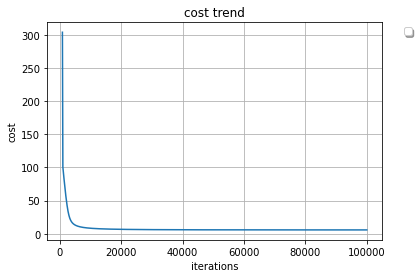

The score was 0.97 and            Precision was 0.97 and Recall was 0.97


In [4]:
lr1.fit()

In [5]:
np.array([lr1.misclassified["Predicted"] == lr1.misclassified["Actual"]])

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True]])

In [6]:
lr1.table_

,Row 0,Row 39
Predicted Prob,0.140047,0.696238
Actual Class,1.000000,0.000000




### Reasoning

It is clear from the above tables that only 2 values are misclassified . (Row 0 , and Row 39)

The reason precision and predictive probability of the Model increase becuase , As can be seen , 
    1) The model predicts row 0 has 0.14 probability of being of class 1 , but actually belong to class 1 
    2) The model predicts row 39 has 0.69 probability of being of class 1 , but actually belong to class 0
    
 
This misclassification of increases the denomintor of Precision and Recall , and hence eliminating these values , increases overal predictive power


In [7]:
lr=LogisticRegression(index_no=[1,39], epsilon=0.0 ,learningRate=0.1e-5,maxIteration=100000,filepath= r'/content/sample_data/Lab3_data (1).xls')

100%|██████████| 100000/100000 [00:03<00:00, 30213.92it/s]


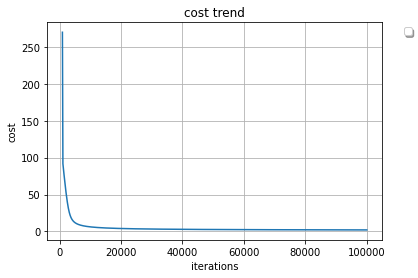

The score was 0.99 and            Precision was 1.0 and Recall was 0.97


In [8]:
lr.fit()

In [9]:
lr.table_

,Row 0,Row 39
Predicted Prob,0.999971,0.999743
Actual Class,1.000000,1.000000


In [10]:
np.array([lr.misclassified["Predicted"] == lr.misclassified["Actual"]])


array([[ True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True]])

### The new model , only misclassifies one point. Hence better predicitability

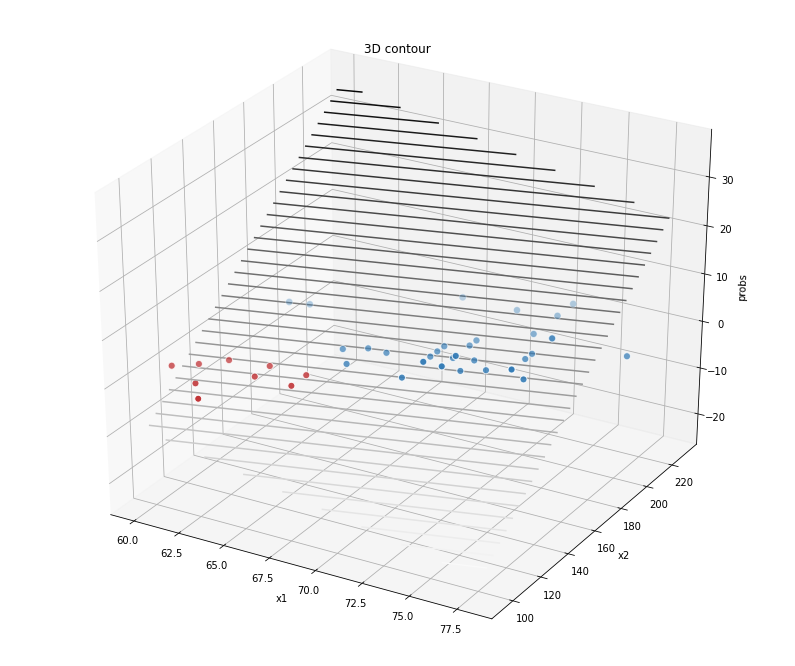

In [11]:
lr.plot3D()

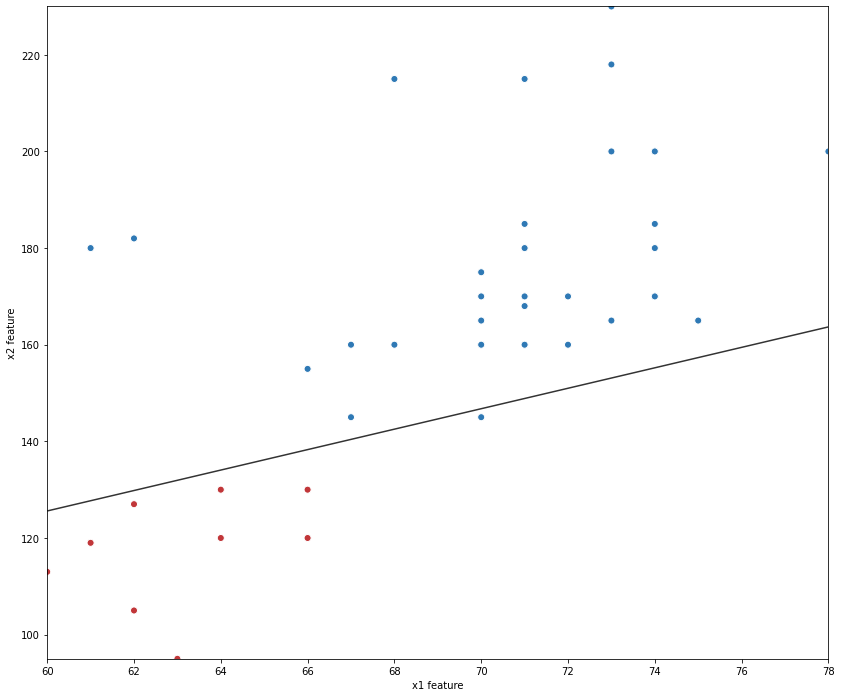

In [12]:
lr.scatterPlt()

### 3D plot showing the difference

### New Model

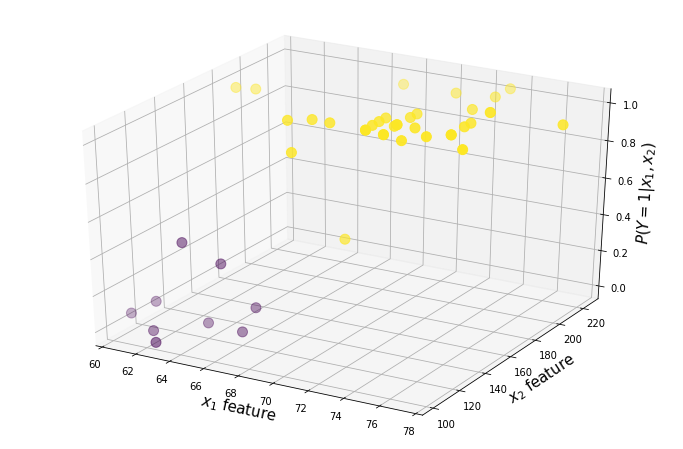

In [13]:
lr.plot()

### Old Model

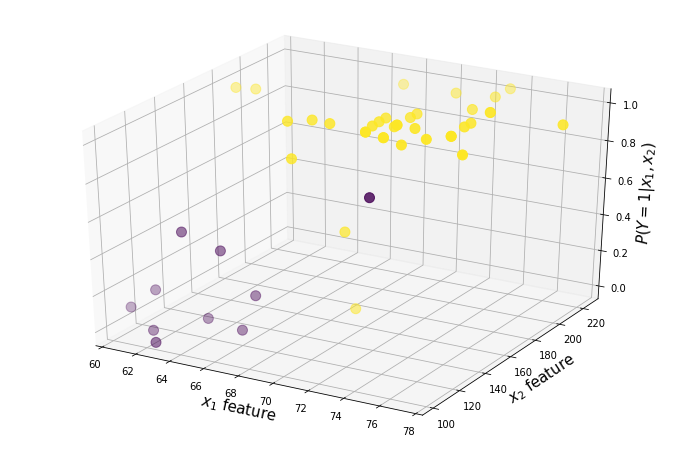

In [14]:
lr1.plot()